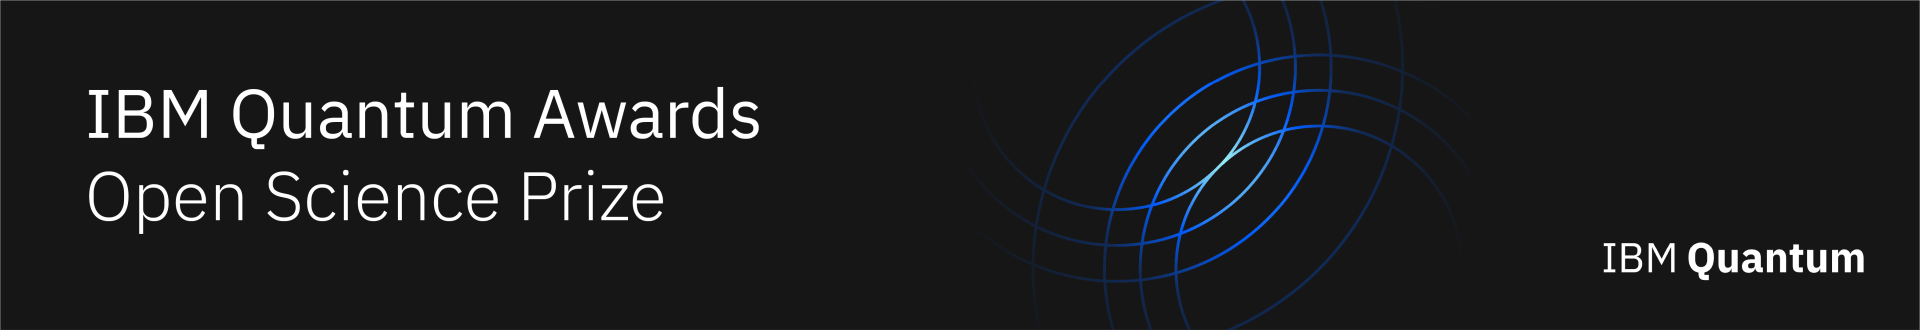

# IBM Quantum Awards: Open Science Prize 2022

### Contributer: [Rajiv Sangle](https://www.linkedin.com/in/rajiv-sangle/) (Master's student of Quantum Technolgy) $^{\dagger}$

### Academic Advisor: [Apoorva Patel](https://chep.iisc.ac.in/Personnel/adpatel.html) (Professor at Center for High Energy Physics) $^{\dagger}$

#### $^{\dagger}$Affiliation: Indian Institute of Science (IISc), Bengaluru (India) 

### 1.1) Heisenberg spin-1/2 model on the kagome lattice

First, we define,
$$
\begin{equation}
    X_{i} \equiv \bigotimes_{k=1}^{\text{|vertices|}} (\sigma^{\mu})_{k}  \text{ ; where $\sigma^{\mu}=\sigma^{x}$ for $k = i$} \\
    Y_{i} \equiv \bigotimes_{k=1}^{\text{|vertices|}} (\sigma^{\mu})_{k}  \text{ ; where $\sigma^{\mu}=\sigma^{y}$ for $k = i$} \\
    Z_{i} \equiv \bigotimes_{k=1}^{\text{|vertices|}} (\sigma^{\mu})_{k}  \text{ ; where $\sigma^{\mu}=\sigma^{z}$ for $k = i$} \\
    \text{and $\sigma^{\mu}=I$ for all $k \neq i$} \\
\end{equation}
$$

where $\sigma^{x}$, $\sigma^{y}$, and $\sigma^{z}$ are the usual $2 \times 2$ Pauli matrices, and $I$ is the $2 \times 2$ Identity matrix.

The subscript $k$ simply denotes the site/position on which the corresponding operator $\sigma^{\mu}$ acts.

The $XXX$ Heisenberg model Hamiltonian for this Prize is defined as
$$
\begin{equation}
    \boxed{H = \sum_{\langle i j \rangle}^N X_i X_{j} + Y_i Y_{j} + Z_i Z_{j}} \text{ ; where $N =$ |edges|}\\
    \text{The dimension of $H$ is $2^{\text{|vertices|}} \times 2^{\text{|vertices|}}$.}
\end{equation}
\\
$$
where $\langle i j \rangle$ is sum over neighboring spins and $X$, $Y$, and $Z$ are defined above for every site $i$.

The arrangement we are interested in is a __kagome__ lattice, a unique lattice structure made up of corner-sharing triangles (as shown in the unit cell below).

![title](kagome_unit_cell.png)

$$
\begin{equation}
    \text{$\therefore$ |vertices| $= 18$ and |edges| is $12$ for the kagome lattice structure depicted above.}
\end{equation}
\\
$$

We now define the Pauli-vector:
$$
\begin{equation}
    \overrightarrow{\sigma_{i}} \equiv (X_{i}, Y_{i}, Z_{i}) \\
    \therefore \boxed{H = \sum \limits_{<i,j>}^{18} \overrightarrow{\sigma_{i}}.\overrightarrow{\sigma_{j}}} \\
    \text{$\therefore$ dim($H$) $= 2^{\text{12}} \times 2^{\text{12}}$}
\end{equation}
$$

We attempt to simulate the ground state of this arrangment using the Variational Quantum Eigensolver (VQE) [1-3].

\[1\] "A variational eigenvalue solver on a quantum processor." A. Peruzzo, et al. [arXiv:1304.3061](https://arxiv.org/abs/1304.3061) [quant-ph] (2013).

\[2\] "Variational quantum algorithms." M. Cerezo, et al. [arXiv:2012.09265v2](https://arxiv.org/abs/2012.09265v2) [quant-ph] (2021).

\[3\] "The Variational Quantum Eigensolver: a review of methods and best practices." J. Tilly, et al. [arXiv:2111.05176v3](https://arxiv.org/abs/2111.05176v3) [quant-ph] (2022).


### <font color=red>Please ensure that directories with the following names are present at the location of this file:</font>

### a) <font color=green>Backend_noise_models</font>
### b) <font color=green>Backend_objects</font>
### c) <font color=green>Result_pickle_objects</font>

### <font color=red>Important objects shall be stored in these folders during code execution!</font>

In [1]:
import numpy as np

import time
from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})  # enlarge matplotlib fonts

In [2]:
run_datatime = "-" + datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

version_number = 1.1
version = "_v" + str(version_number)

directory_results = "Result_pickle_objects/"
problem_name = "_vqe_kagome_final" + version

filename = directory_results + "logs" + problem_name + run_datatime + ".log"
print(filename)

Result_pickle_objects/logs_vqe_kagome_final_v1.1-2023-04-02_12-05-31.log


In [3]:
log_file = open(directory_results + "logs" + problem_name + run_datatime + ".log", 'a')

In [4]:
print("LOG::START::" + datetime.now().strftime("%Y-%m-%d_%H:%M:%S"))
print(f"")

print("LOG::START::" + datetime.now().strftime("%Y-%m-%d_%H:%M:%S"), file=log_file)
print(f"", file=log_file)

LOG::START::2023-04-02_12:05:31


### 1.2) Qiskit nature kagome unit cell
Using Qiskit nature's [`Lattice` object](https://qiskit.org/documentation/nature/tutorials/10_lattice_models.html), we can represent any spin lattice as a graph. Here we construct the unit cell of a kagome lattice by defining a list of edges between the twelve sites. This `Lattice` representation will be convenient to use when defining the $XXX$ Hamiltonian terms.

In [5]:
import rustworkx as rx

from qiskit_nature.problems.second_quantization.lattice import Lattice

# Custom Heisenberg couplings
import sys
sys.path.append(r'.')  # may be needed if running notebook on a cloud service
from heisenberg_model import HeisenbergModel

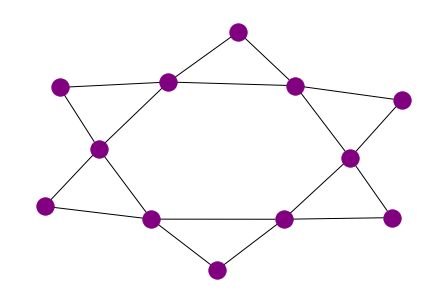

In [6]:
# Kagome unit cell
num_sites = 12
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(num_sites))
edge_list = [
    (0, 1, t),
    (1, 2, t),
    (2, 3, t),
    (3, 4, t),
    (4, 5, t),
    (5, 0, t),
    (0, 6, t),
    (1, 6, t),
    (1, 7, t),
    (2, 7, t),
    (2, 8, t),
    (3, 8, t),
    (3, 9, t),
    (4, 9, t),
    (4, 10, t),
    (5, 10, t),
    (5, 11, t),
    (0, 11, t),
]
# Generate graph from the list of edges
graph.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell = Lattice(graph)

# Draw Lattice
kagome_unit_cell.draw(style={'node_color':'purple'})
# plt.savefig('kagome_unit_cell.png')
plt.show()

Now that we have the lattice geometry, we can place each term in the Hamiltonian on its corresponding edge. This is done by using the custom `HeisenbergModel` found in the heisenberg_model.py file. This model is based on Qiskit Nature's [`IsingModel` class](https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.hamiltonians.IsingModel.html) . It places $XX + YY + ZZ$ on each edge of the lattice (per the Hamiltonian's definition).

We will also need to specify how the spin-1/2 particles map to qubits. Using Qiskit nature's `LogarithmicMapper`, we can map each spin-1/2 site to a single qubit. For more information on Qiskit nature's spin mappings see [here](https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.SpinMapper.html#spinmapper).

In [7]:
from qiskit_nature.mappers.second_quantization import LogarithmicMapper

In [8]:
# Build Hamiltonian from graph edges
heis = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell,
    uniform_interaction=1.0,  # same spin-spin interaction weight as used in graph
    uniform_onsite_potential=0.0,  # No singe site external field
)

# The Lattice needs an explicit mapping to the qubit states.
# We map 1 qubit for 1 spin-1/2 particle using the LogarithmicMapper
log_mapper = LogarithmicMapper()
# Multiply by factor of 4 to account for (1/2)^2 terms from spin operators in the HeisenbergModel
ham = 4 * log_mapper.map(heis.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect.
# There are 18 edges and 3 terms per edge (XX, YY, and ZZ),
# so there should be 54 equally weighted terms.
ham

PauliSumOp(SparsePauliOp(['ZIIIIIZIIIII', 'IZIIIIZIIIII', 'IZIIIIIZIIII', 'IIZIIIIZIIII', 'IIIIIIZZIIII', 'IIZIIIIIZIII', 'IIIZIIIIZIII', 'IIIIIIIZZIII', 'IIIZIIIIIZII', 'IIIIZIIIIZII', 'IIIIIIIIZZII', 'IIIIZIIIIIZI', 'IIIIIZIIIIZI', 'IIIIIIIIIZZI', 'ZIIIIIIIIIIZ', 'IIIIIZIIIIIZ', 'IIIIIIZIIIIZ', 'IIIIIIIIIIZZ', 'YIIIIIYIIIII', 'IYIIIIYIIIII', 'IYIIIIIYIIII', 'IIYIIIIYIIII', 'IIIIIIYYIIII', 'IIYIIIIIYIII', 'IIIYIIIIYIII', 'IIIIIIIYYIII', 'IIIYIIIIIYII', 'IIIIYIIIIYII', 'IIIIIIIIYYII', 'IIIIYIIIIIYI', 'IIIIIYIIIIYI', 'IIIIIIIIIYYI', 'YIIIIIIIIIIY', 'IIIIIYIIIIIY', 'IIIIIIYIIIIY', 'IIIIIIIIIIYY', 'XIIIIIXIIIII', 'IXIIIIXIIIII', 'IXIIIIIXIIII', 'IIXIIIIXIIII', 'IIIIIIXXIIII', 'IIXIIIIIXIII', 'IIIXIIIIXIII', 'IIIIIIIXXIII', 'IIIXIIIIIXII', 'IIIIXIIIIXII', 'IIIIIIIIXXII', 'IIIIXIIIIIXI', 'IIIIIXIIIIXI', 'IIIIIIIIIXXI', 'XIIIIIIIIIIX', 'IIIIIXIIIIIX', 'IIIIIIXIIIIX', 'IIIIIIIIIIXX'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j

### 2.1) Computing ground state energy (Computationally)
With the Hamiltonian in hand, we can now calculate the expected ground state and its energy. Qiskit offers different methods to do this. The method [here](https://qiskit.org/documentation/apidoc/algorithms.html#minimum-eigensolvers) computes the ground state energy. This [method](https://qiskit.org/documentation/apidoc/algorithms.html#eigensolvers) computes the ground state ($k=0$) and potentially higher energy states if the users wishes ($k>0$).

Below is an example calculation of finding the lowest 3 energies ($k=3$) of the system using the second method. Remember that for this year's Prize, you will only need to use VQE to find the ground state energy and not any excited state energies.

In [9]:
from qiskit.algorithms import NumPyEigensolver

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=20)
exact_result = exact_solver.compute_eigenvalues(ham)
print(exact_result.eigenvalues)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 3)

[-18.         -18.         -16.96132284 -16.96132284 -16.96132284
 -16.94488902 -16.94488902 -16.94488902 -16.94488902 -16.92960648
 -16.92960648 -16.92960648 -16.92960648 -16.80979384 -16.80979384
 -16.80979384 -16.73525336 -16.72928939 -16.72928939 -16.56740607]


__It is noted that -18 is found twice. This means there are actually two ground states for this system.__

__The -16.96 energy is the first excited state with a degeneracy of three.__

__The eigenspectrum of this Hamiltonian with 12 qubits is of cardinality $2^{12} \times 2^{12}$. We have reported above the lowest 20 eigenvalues.__

### 2.2) Computing ground state energy (Analytically)

The exact ground state of the Kagome arrangement can be analytically obtained by first analysing the triangular sub-structure.

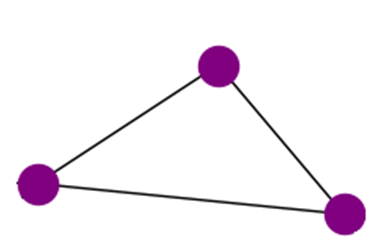

This triangular sub-structure/graph has 3 vertices (qubits) and 3 edges.

The Hamiltonian can therefore be written as:
$$
\begin{equation}
    \boxed{H_{3} = \sum \limits_{<i,j>}^{3} \overrightarrow{\sigma_{i}}.\overrightarrow{\sigma_{j}} = \overrightarrow{\sigma_{1}}.\overrightarrow{\sigma_{2}} + \overrightarrow{\sigma_{2}}.\overrightarrow{\sigma_{3}} + \overrightarrow{\sigma_{3}}.\overrightarrow{\sigma_{1}}}
\end{equation}
$$

Hence, the dimension of $H_{3} = 2^{3} \times 2^{3}$.

(Note that $\overrightarrow{\sigma_{i}}.\overrightarrow{\sigma_{j}} = \overrightarrow{\sigma_{j}}.\overrightarrow{\sigma_{i}}$)

We denote the total angular moment of this triangular spin arrangment by $\overrightarrow{\sigma}$.

$$
\begin{equation}
    \therefore \boxed{\overrightarrow{\sigma} \equiv \sum \limits_{i=1}^{|vertices|} \overrightarrow{\sigma_{i}} = \overrightarrow{\sigma_{1}} + \overrightarrow{\sigma_{2}} + \overrightarrow{\sigma_{3}}}
\end{equation}
$$

Now,
$$
\begin{equation}
    \overrightarrow{\sigma}.\overrightarrow{\sigma} = (\overrightarrow{\sigma_{1}} + \overrightarrow{\sigma_{2}} + \overrightarrow{\sigma_{3}}).(\overrightarrow{\sigma_{1}} + \overrightarrow{\sigma_{2}} + \overrightarrow{\sigma_{3}}) \equiv (\overrightarrow{\sigma})^{2}
\end{equation}
$$

Similarly, we define,
$$
\begin{equation}
    (\overrightarrow{\sigma_{i}})^{2} \equiv \overrightarrow{\sigma_{i}}.\overrightarrow{\sigma_{i}} \text{ ; where $1 \leq i \leq 3$} \\
    \implies \boxed{H_{3} = \frac{1}{2}\bigg[(\overrightarrow{\sigma})^{2} - (\overrightarrow{\sigma_{1}})^{2} - (\overrightarrow{\sigma_{2}})^{2} - (\overrightarrow{\sigma_{3}})^{2}\bigg]}
\end{equation}
$$

Now, the Spin Angular Momentum operator (dimensionless) is given by:
$$
\begin{equation}
    \boxed{\overrightarrow{S_{i}} = \frac{1}{2} \overrightarrow{\sigma_{i}}} \text{ ; where } \overrightarrow{S_{i}} = ({S^{x}_{i}}, {S^{y}_{i}}, {S^{z}_{i}})
\end{equation}
$$

Therefore, in terms of the Spin Angular Momentum operator (dimensionless):
$$
\begin{equation}
    \implies \boxed{H_{3} = \frac{1}{2}\bigg[(2\overrightarrow{S})^{2} - (2\overrightarrow{S_{1}})^{2} - (2\overrightarrow{S_{2}})^{2} - (2\overrightarrow{S_{3}})^{2}\bigg]}
\end{equation}
$$

$$
\begin{equation}
    \text{where $\overrightarrow{S} = \sum \limits_{i=1}^{\text{|vertices|}} \overrightarrow{S_{i}} = \overrightarrow{S_{1}} + \overrightarrow{S_{2}} + \overrightarrow{S_{3}}$ (since |vertices| $= 3$)} \\
    \text{$(\overrightarrow{S})^{2} \equiv \overrightarrow{S}.\overrightarrow{S}$ and $(\overrightarrow{S_{i}})^{2} \equiv \overrightarrow{S_{i}}.\overrightarrow{S_{i}}$}
\end{equation}
$$

$$
\begin{equation}
    \boxed{\therefore H_{3} = 2\bigg[(\overrightarrow{S})^{2} - (\overrightarrow{S_{1}})^{2} - (\overrightarrow{S_{2}})^{2} - (\overrightarrow{S_{3}})^{2}\bigg]}
\end{equation}
$$


Now the eigenvalues of $(\overrightarrow{S_{i}})^{2}$ are $s_{i}(s_{i} + 1)$ where $s_{i} = \frac{1}{2}$.

Therefore, from the angular momentum algebra of tensor products and direct sums, we get:

$$
\begin{equation}
    \boxed{\bigg( \frac{1}{2} \otimes \frac{1}{2} \bigg) \otimes \frac{1}{2} = \big( 0 \oplus 1 \big) \otimes \frac{1}{2} = \frac{1}{2} \oplus \frac{1}{2} \oplus \frac{3}{2}}
\end{equation}
$$

$$\boxed{\text{Hence, the eigenvalues of $(\overrightarrow{S})^{2}$ are $s(s + 1)$ where $s_{i} \in \bigg \{ \frac{1}{2}, \frac{1}{2}, \frac{3}{2} \bigg \}$.}}$$

Now, if any two spin-1/2 vertices in the triangular graph are considered $\boxed{\frac{1}{2} \otimes \frac{1}{2} = 0 \oplus 1}$
then the $\textit{anti-ferromagnetic}$ coupling requires that the $\textbf{ground state}$ of the two spin-1/2 vertices is the $\boxed{s = 0; m_{s}=0}$ $\textbf{ (singlet) anti-symmetric state}$:

$$
\begin{equation}
    \boxed{{\big|s = 0; m_{0} = 0 \big\rangle}_{1,2} = \frac{1}{\sqrt{2}} \bigg( {{\bigg| s_{1} = \frac{1}{2}; m_{1/2} = -\frac{1}{2} \bigg\rangle}_{i=1} \otimes {\bigg| s_{2} = \frac{1}{2}; m_{1/2} = +\frac{1}{2} \bigg\rangle}_{i=2}} - {{\bigg| s_{1} = \frac{1}{2}; m_{1/2} = +\frac{1}{2} \bigg\rangle}_{i=1} \otimes {\bigg| s_{2} = \frac{1}{2}; m_{1/2} = -\frac{1}{2} \bigg\rangle}_{i=2}} \bigg)}
\end{equation}
$$


$\therefore \boxed{{\big|s = 0; m_{0} = 0 \big\rangle}_{1,2} \equiv \frac{1}{\sqrt{2}} \big( {| \downarrow \uparrow \ \rangle} - {| \uparrow \downarrow \ \rangle} \big) }$ in terms of the eigenstates of ${S_{i}^{z}}$ where $i \in \{ 1, 2 \}$. 

In the presence of the third spin-1/2 vertex in this triangular graph with the sub-system of the two other spins in the ground state, the total spin of the composite system is $s = \frac{1}{2}$ since $\boxed{0 \otimes \frac{1}{2} = \frac{1}{2}}$.

Thus, this triangular spin-1/2 system has two ground states corresponding to $m_{s = 1/2} \in \big\{ -\frac{1}{2}, +\frac{1}{2} \big\}$

$\textbf{Therefore, the two degenerate ground states are given by:}$

$$\boxed{{\big|s = \frac{1}{2}; m_{1/2} = +\frac{1}{2} \big\rangle_{1,2,3}} = {\big|s = 0; m_{0} = 0 \big\rangle_{1,2}} \otimes {\bigg| s_{3} = \frac{1}{2}; m_{1/2} = +\frac{1}{2} \bigg\rangle}_{3}}$$

$$\boxed{{\big|s = \frac{1}{2}; m_{1/2} = -\frac{1}{2} \big\rangle_{1,2,3}} = {\big|s = 0; m_{0} = 0 \big\rangle_{1,2}} \otimes {\bigg| s_{3} = \frac{1}{2}; m_{1/2} = -\frac{1}{2} \bigg\rangle}_{3}}$$

$$\therefore s = \frac{1}{2} \text{ for the ground state of this triangular structure, and } s_{1} = s_{2} = s_{3} = \frac{1}{2} $$

From angular momentar algebra, the eigenvalues of $\boxed{H_{3} = 2[(\overrightarrow{S})^{2} - (\overrightarrow{S_{1}})^{2} - (\overrightarrow{S_{2}})^{2} - (\overrightarrow{S_{3}})^{2}]}$ are given by:

$$ \boxed{E_{3} = 2\big[s(s+1) - s_{1}(s_{1}+1) - s_{2}(s_{2}+1) - s_{3}(s_{3}+1) \big]} $$

$\textbf{Therefore, the ground state energy of the two degenerate ground states is:}$

$$E_{3} = 2\bigg[\frac{1}{2}\bigg(\frac{1}{2}+1\bigg) - \frac{1}{2}\bigg(\frac{1}{2}+1\bigg) - \frac{1}{2}\bigg(\frac{1}{2}+1\bigg) - \frac{1}{2}\bigg(\frac{1}{2}+1\bigg) \bigg]$$

$$ \implies \boxed{(E_{3})_{ground} = -3}$$

#### Back to the Heisenberg spin-1/2 model on the Kagome arraangment for the Open Science Prize ...!

If we go about tiling the triangular graph, in its ground state, on the edges of an hexagon, the constraint of having a singlet state (𝑠 = 0) between any two vertices in a triangle gives rise to the following two degenerate ground states for the Kagome unit cell, where __the green edge between two vertices denotes a singlet state (𝑠 = 0)__.


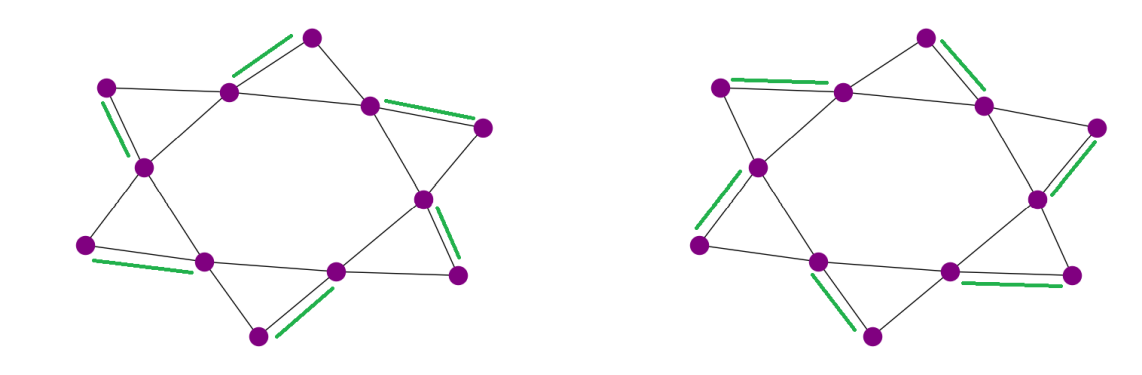

__The green edge between two vertices denotes a singlet state ($𝑠 = 0$), which essentially is the anti-symmetric Bell state in the Pauli-Z basis.__

$\textbf{In general, therefore, the ground state is given by:}$

$$ \boxed{{\big| \psi_{ground} \big\rangle} = \bigotimes_{<i,j>}^{6} {\big| \psi^{-} \big\rangle}_{ij}} $$

where $\boxed{{\big| \psi^{-} \big\rangle}_{ij} \equiv \frac{1}{\sqrt{2}} \big({|0\rangle_{i} \otimes |1\rangle_{j}} - {|1\rangle_{i} \otimes |0\rangle_{j}} \big)} $ in terms of the eigenstates of the Pauli-Z basis. 

and the tensor product is over the 6 neighbouring pairs of sites $<i,j>$ each pair forming a singlet.

In [10]:
import qiskit

from qiskit import QuantumCircuit, transpile

In [11]:
import pickle

In [12]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [13]:
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator, Options)

service = QiskitRuntimeService()

In [14]:
from qiskit import IBMQ

IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

In [15]:
# print available backend and select one
quantum_devices = service.backends(simulator=False)
# save_object(quantum_devices, "Backend_objects/" + "quantum_devices" + problem_name + run_datatime + ".pkl")

print('Quantum Devices:')
for i in range(len(quantum_devices)):
    print(f"{i+1}) {quantum_devices[i].name}")

print()

quantum_simulators = service.backends(simulator=True)
# save_object(quantum_backends, "Backend_objects/" + "quantum_simulators" + problem_name + run_datatime + ".pkl")

print('Simulators:')
for i in range(len(quantum_simulators)):
    print(f"{i+1}) {quantum_simulators[i].name}")

Quantum Devices:
1) ibmq_guadalupe
2) ibmq_lima
3) ibmq_belem
4) ibmq_quito
5) ibmq_jakarta
6) ibmq_manila
7) ibm_lagos
8) ibm_nairobi
9) ibm_perth
10) ibm_oslo

Simulators:
1) ibmq_qasm_simulator
2) simulator_statevector
3) simulator_mps
4) simulator_extended_stabilizer
5) simulator_stabilizer


In [16]:
backend_guadalupe_provider = provider.get_backend("ibmq_guadalupe")
save_object(backend_guadalupe_provider, "Backend_objects/" + "guadalupe_backend_provider" + problem_name + run_datatime + ".pkl")

backend_guadalupe_service = service.backend("ibmq_guadalupe")

backend_guadalupe = backend_guadalupe_service

C:\Users\MEGHANA\AppData\Local\Temp\ipykernel_10316\3495483943.py:3: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)


In [17]:
options_coupling = Options(
    simulator={
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=0
)

In [18]:
options_r0 = Options(resilience_level=0)

options_r1 = Options(resilience_level=1)

options_r2 = Options(resilience_level=2)

options_r3 = Options(resilience_level=3)

Since the Kagome Hamiltonian is defined over 12 qubits, and the ibmq_guadalupe has 16 qubits, to execute VQE on ibmq_guadalupe, we need to "inflate" the Hamilontian from 12 qubits to 16 qubits to match ibmq_guadalupe. 

The extra 4 qubits will not participate in the energy expectation value. Here, we've chosen the 4 qubits that won't participate to be 0, 6, 9, 15 since their connctivity is only with 1 qubit.

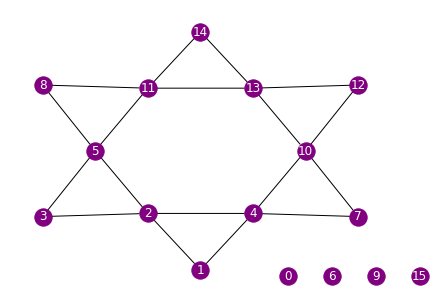

In [19]:
# Kagome unit cell
num_qubits = 16
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph_16 = rx.PyGraph(multigraph=False)
graph_16.add_nodes_from(range(num_qubits))
edge_list = [
    (1, 2, t),
    (2, 3, t),
    (3, 5, t),
    (5, 8, t),
    (8, 11, t),
    (11, 14, t),
    (14, 13, t),
    (13, 12, t),
    (12, 10, t),
    (10, 7, t),
    (7, 4, t),
    (4, 1, t),
    (4, 2, t),
    (2, 5, t),
    (5, 11, t),
    (11, 13, t),
    (13, 10, t),
    (10, 4, t),
]
# Generate graph from the list of edges
graph_16.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell_16 = Lattice(graph_16)

# Draw Lattice and include labels to check we exclude the right spins
# Specify node locations for better visualizations
kagome_pos = {0:[1,-1], 6:[1.5,-1], 9:[2,-1], 15:[2.5,-1], 
              1:[0,-0.8], 2:[-0.6,1], 4:[0.6,1], 10:[1.2,3], 
              13:[0.6,5], 11:[-0.6,5], 5:[-1.2,3], 3:[-1.8,0.9], 
              8:[-1.8,5.1], 14:[0,6.8], 7:[1.8,0.9], 12:[1.8,5.1]}
kagome_unit_cell_16.draw(style={'with_labels':True, 'font_color':'white', 'node_color':'purple', 'pos':kagome_pos})
plt.show()

In [20]:
# Build Hamiltonian from graph edges
heis_16 = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell_16,
    uniform_interaction=t,
    uniform_onsite_potential=0.0,  # No singe site external field
)

# Map from SpinOp to qubits just as before.
log_mapper = LogarithmicMapper()
ham_16 = 4 * log_mapper.map(heis_16.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect:
# 18 ZZ, 18 YY, and 18 XX terms over 16 qubits instead of over 12 qubits
ham_16

PauliSumOp(SparsePauliOp(['IZZIIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIIZIIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIIIZIIZIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIZZI', 'IYYIIIIIIIIIIIII', 'IIYYIIIIIIIIIIII', 'IYIIYIIIIIIIIIII', 'IIYIYIIIIIIIIIII', 'IIYIIYIIIIIIIIII', 'IIIYIYIIIIIIIIII', 'IIIIYIIYIIIIIIII', 'IIIIIYIIYIIIIIII', 'IIIIYIIIIIYIIIII', 'IIIIIIIYIIYIIIII', 'IIIIIYIIIIIYIIII', 'IIIIIIIIYIIYIIII', 'IIIIIIIIIIYIYIII', 'IIIIIIIIIIYIIYII', 'IIIIIIIIIIIYIYII', 'IIIIIIIIIIIIYYII', 'IIIIIIIIIIIYIIYI', 'IIIIIIIIIIIIIYYI', 'IXXIIIIIIIIIIIII', 'IIXXIIIIIIIIIIII', 'IXIIXIIIIIIIIIII', 'IIXIXIIIIIIIIIII', 'IIXIIXIIIIIIIIII', 'IIIXIXIIIIIIIIII', 'IIIIXIIXIIIIIIII', 'IIIIIXIIXIIIIIII', 'IIIIXIIIIIXIIIII', 'IIIIIIIXIIXIIIII', 'IIIIIXIIIIIXIIII', 'IIIIIIIIXIIXIIII', 'IIIIIIIIIIXIX

### 3.1) Match qubit layout
The ansatz is currently defined over 12 qubits, but it will be executed on guadalupe which has 16 qubits. To make the ansatz compatible with guadalupe and the inflated Hamiltonian, we can specify the qubit layout on the real device using the transpiler (shown below). We exclude the four qubits with fewest neighbors.

In [21]:
# Force anstaz to be applied to qubits in the heavy hex.
# Avoid the outer qubits 0, 6, 9, and 15 which we accounted for in the lattice definition.

q_layout = [1, 2, 3, 5, 8, 11, 14, 13, 12, 10, 7, 4]

guadalupe_qubit_layout = transpile(QuantumCircuit(12), backend=backend_guadalupe, initial_layout=q_layout)

display(guadalupe_qubit_layout.draw(fold=300))

ancilla_0 -> 0 
                
       q_0 -> 1 
                
       q_1 -> 2 
                
       q_2 -> 3 
                
      q_11 -> 4 
                
       q_3 -> 5 
                
 ancilla_1 -> 6 
                
      q_10 -> 7 
                
       q_4 -> 8 
                
 ancilla_2 -> 9 
                
      q_9 -> 10 
                
      q_5 -> 11 
                
      q_8 -> 12 
                
      q_7 -> 13 
                
      q_6 -> 14 
                
ancilla_3 -> 15

### 4) Solution Approach:

### 4.1) Initial State Preparation

We use either of the analytically obtained ground states as the initial state. Easy to prepapre. Nice product state.

In [22]:
ancilla_q = [0, 6, 9, 15]

singlet_q1_16 = [1, 3, 8, 14, 12, 7]

singlet_q2_16_gs1 = [4, 2, 5, 11, 13, 10]
singlet_q2_16_gs2 = [2, 5, 11, 13, 10, 4]

Degenerate Ground State (Configuration 1):


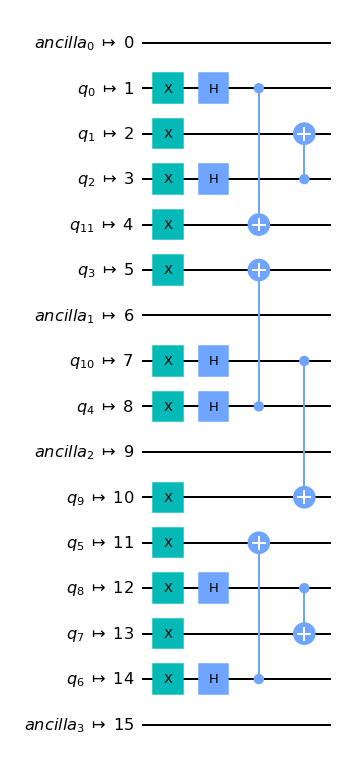

In [23]:
initial_rvb_rz_gs1 = guadalupe_qubit_layout.copy()

initial_rvb_rz_gs1.x(q_layout)
initial_rvb_rz_gs1.h(singlet_q1_16)
initial_rvb_rz_gs1.cx(singlet_q1_16, singlet_q2_16_gs1)


print("Degenerate Ground State (Configuration 1):")
display(initial_rvb_rz_gs1.draw("mpl"))

Degenerate Ground State (Configuration 2):


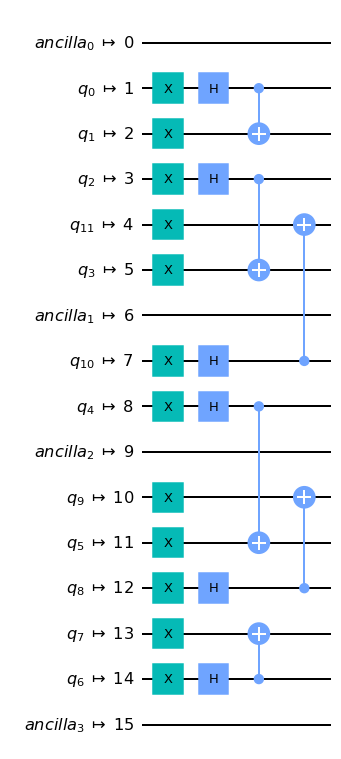

In [24]:
initial_rvb_rz_gs2 = guadalupe_qubit_layout.copy()

initial_rvb_rz_gs2.x(q_layout)
initial_rvb_rz_gs2.h(singlet_q1_16)
initial_rvb_rz_gs2.cx(singlet_q1_16, singlet_q2_16_gs2)


print("Degenerate Ground State (Configuration 2):")
display(initial_rvb_rz_gs2.draw("mpl"))

### Sanity Check:

We verify that these two circuits indeed produce the ground state of the Kagome-star on the noiseless simulator with energy as -18.

In [25]:
# Setup Estimator
start = time.time()
print("Start Time:", start)

gs_circuits = [transpile(initial_rvb_rz_gs1, backend=backend_guadalupe), 
               transpile(initial_rvb_rz_gs2, backend=backend_guadalupe)]

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    # Prepare primitive
    rt_estimator = RuntimeEstimator(session=session, options=options_coupling)

    job_gs = rt_estimator.run(circuits=gs_circuits, observables=[ham_16]*2)
    print(f">>> Job Id: {job_gs.job_id()}")
    
    result_gs = job_gs.result()
    print(f">>> Expectation value of Ground State 1: {result_gs.values[0]}")
    print(f">>> Expectation value of Ground State 2: {result_gs.values[1]}")
    print(f">>> Job Results:\n {result_gs}")
    print()

end = time.time()
print()
print("End Time:", end)

print()
print(f'execution time (s): {end - start:.2f}')

Start Time: 1681596560.3069313
>>> Job Id: cgti15tc26urfj2f7g50


runtime_job._start_websocket_client:WARNING:2023-04-16 03:42:27,184: An error occurred while streaming results from the server for job cgti15tc26urfj2f7g50:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



>>> Expectation value of Ground State 1: -18.0
>>> Expectation value of Ground State 2: -18.0
>>> Job Results:
 EstimatorResult(values=array([-18., -18.]), metadata=[{'variance': 35.985793, 'shots': 4000}, {'variance': 35.995446, 'shots': 4000}])


End Time: 1681596748.3221505

execution time (s): 188.02


### The code above can be run using resilience_level = 3 as well:

In [26]:
# # Setup Estimator
# start = time.time()
# print("Start Time:", start)

# gs_circuits = [transpile(initial_rvb_rz_gs1, backend=backend_guadalupe), 
#                transpile(initial_rvb_rz_gs2, backend=backend_guadalupe)]

# with Session(service=service, backend="ibmq_qasm_simulator") as session:
#     # Prepare primitive
#     rt_estimator = RuntimeEstimator(session=session, options=options_r3)

#     job_gs = rt_estimator.run(circuits=gs_circuits, observables=[ham_16]*2)
#     print(f">>> Job Id: {job_gs.job_id()}")
    
#     result_gs = job_gs.result()
#     print(f">>> Expectation value of Ground State 1: {result_gs.values[0]}")
#     print(f">>> Expectation value of Ground State 2: {result_gs.values[1]}")
#     print(f">>> Job Results:\n {result_gs}")
#     print()

# end = time.time()
# print()
# print("End Time:", end)

# print()
# print(f'execution time (s): {end - start:.2f}')

### The following screenshot is of one such execution to evaluate the two ground states.

#### Jod Id = 'cfrfhkrmcdu9d5vibgvg'

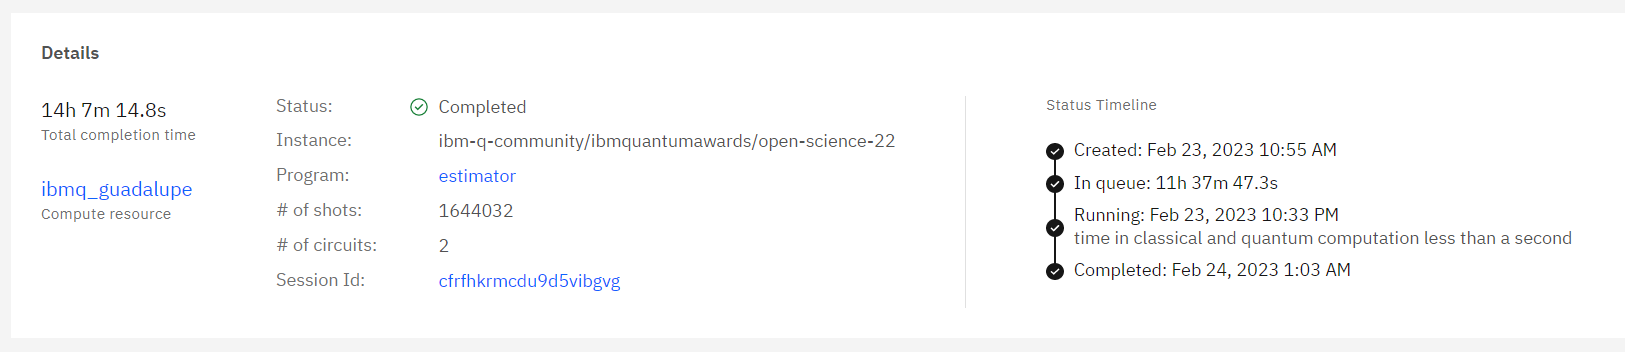

As seen from the results for this job below, __the ground state has been successfully prepared with an error margin of $\approx 0.477 \%$ around $-18.0$ for the _first configuration_ of the ground state.__

__Thus the average of the confidence interval for the _first configuration_ of the ground state is $\approx -17.9691$__

We try to optimize the energy for this configuration in the VQE implementation ahead.

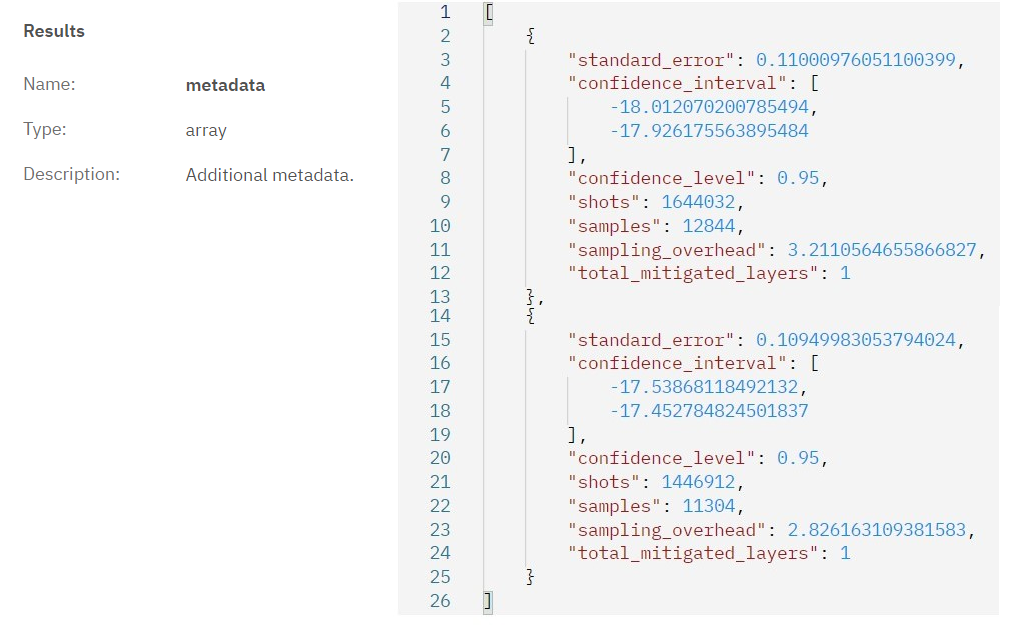

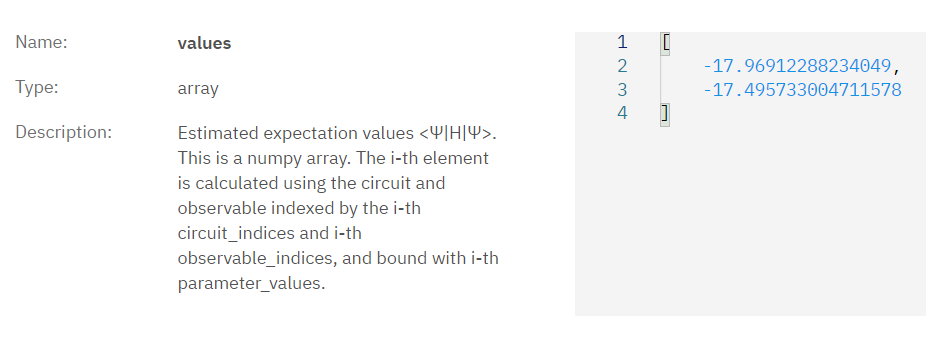

### 4.2) Hardware-Efficient Ansatz

__We build the ansatz using only the basis gates of _ibmq\_guadalupe_.__

__As seen below, RZ is the only parameterized basis gate for _ibmq\_guadalupe_.__

__Non-basis gates are eventually decomposed into basis gates but this often leads to more accumulation of noise.__

In [27]:
print("Basis gates of ibmq_guadalupe:", backend_guadalupe.basis_gates)

Basis gates of ibmq_guadalupe: ['id', 'rz', 'sx', 'x', 'cx', 'reset']


__We create to heuristic parameterized ansatz that satifies the following properties:__

__1) Only fundamental gates (RZ) are used.__

__2) Should create entanglement only in the qubit pairs that should form a singlet state.__

In [28]:
from qiskit.circuit import ParameterVector

In [29]:
theta_vec = ParameterVector('$\Theta$', 6)

Hardware-Efficient Ansatz:


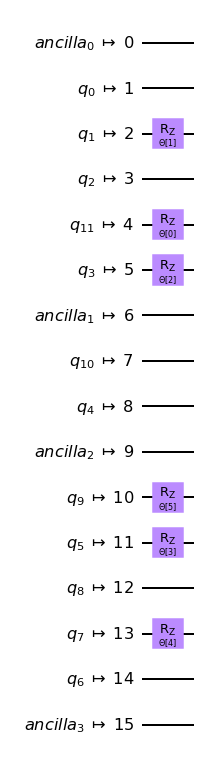

In [30]:
ansatz_rz = guadalupe_qubit_layout.copy()

for i in range(6):
    ansatz_rz.rz(theta_vec[i], singlet_q2_16_gs1[i])

print("Hardware-Efficient Ansatz:")
display(ansatz_rz.draw("mpl"))

### 4.3) Parameterized Quantum Circuit

Parameterized Quantum Circuit:


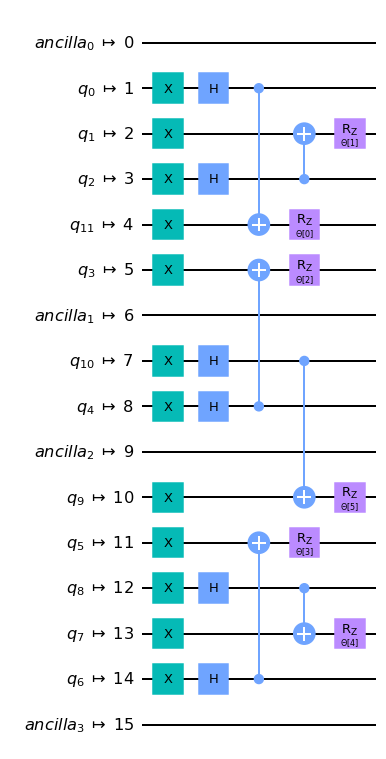

In [31]:
pqc_rz = initial_rvb_rz_gs1.copy()

for i in range(6):
    pqc_rz.rz(theta_vec[i], singlet_q2_16_gs1[i])

print("Parameterized Quantum Circuit:")
display(pqc_rz.draw("mpl"))

### 4.4) Transpiling on _ibmq\_guadalupe_

Number and Type of gates in the cirucit: OrderedDict([('rz', 18), ('sx', 6), ('x', 6), ('cx', 6)])
Number of parameters in the circuit: 6

Trnspiled Parameterized Quantum Circuit:


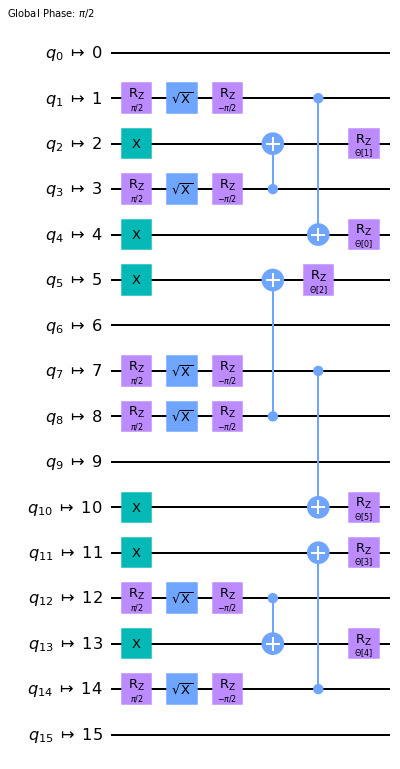

In [32]:
ansatz_opt = transpile(pqc_rz, backend=backend_guadalupe)

print('Number and Type of gates in the cirucit:', ansatz_opt.count_ops())
print('Number of parameters in the circuit:', ansatz_opt.num_parameters)
print()

print("Trnspiled Parameterized Quantum Circuit:")
display(ansatz_opt.draw("mpl"))

In [33]:
# Setup Estimator
start = time.time()
print("Start Time:", start)

gs_circuits = [ansatz_opt]
gs_parameters = [np.zeros(6)]
gs_observables = [ham_16]

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    # Prepare primitive
    rt_estimator = RuntimeEstimator(session=session, options=options_coupling)

    job_gs = rt_estimator.run(circuits=gs_circuits, observables=gs_observables, parameter_values=gs_parameters)
    print(f'Job_Id: {job_gs.job_id()}')

    result_gs = job_gs.result()
    print(f">>> Expectation value of Ground State 1: {result_gs.values[0]}")
    print(f">>> Job Results:\n {result_gs}")
    print()

end = time.time()
print()
print("End Time:", end)

print()
print(f'execution time (s): {end - start:.2f}')

Start Time: 1681596915.2563686
Job_Id: cgti3t5c26urfj2fabr0


runtime_job._start_websocket_client:WARNING:2023-04-16 03:47:00,613: An error occurred while streaming results from the server for job cgti3t5c26urfj2fabr0:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



>>> Expectation value of Ground State 1: -18.0
>>> Job Results:
 EstimatorResult(values=array([-18.]), metadata=[{'variance': 35.986241, 'shots': 4000}])


End Time: 1681597021.8149927

execution time (s): 106.56


### 5) Running the VQE for solving Kagome Ground State

### 5.1) Building Noise Models (if required, for noisy simulation)

In [34]:
from qiskit_aer.noise import NoiseModel

In [35]:
noise_model_service = NoiseModel.from_backend(backend_guadalupe_service)
save_object(noise_model_service, "Backend_noise_models/" + "guadalupe_noise_model_service" + problem_name + run_datatime + ".pkl")

noise_model_provider = NoiseModel.from_backend(backend_guadalupe_provider)
save_object(noise_model_service, "Backend_noise_models/" + "guadalupe_noise_model_provider" + problem_name + run_datatime + ".pkl")

noise_model = noise_model_service

In [36]:
options_coupling = Options(
    simulator={
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=0
)

options_noise_r0 = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=0
)

options_noise_r1 = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=1
)

options_noise_r2 = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=2
)

options_noise_r3 = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 1234,
        "coupling_map": backend_guadalupe.configuration().coupling_map,
        "basis_gates": backend_guadalupe.configuration().basis_gates
    },
    resilience_level=3
)


### 5.2) The Variational Quantum Eigensolver (VQE)

In [38]:
from qiskit.algorithms import MinimumEigensolver, VQEResult

job_id_list = []
job_list = []

job_start_time_list = []
job_end_time_list = []

parameter_list = []

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback
        
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):
                
        # Define objective function to classically minimize over
        def objective(x):            
            job_start = time.time()
            print(f"LOG::JOB_START_TIME::{job_start}")
            print(f"LOG::JOB_START_TIME::{job_start}", file=log_file)
            job_start_time_list.append(job_start)
        
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            
            print(f"LOG::JOB_ID::{job.job_id()}")
            print(f"LOG::JOB_ID::{job.job_id()}", file=log_file)
            job_id_list.append(job.job_id())
            
            print(f"LOG::PARAMETERS::{x}")
            print(f"LOG::PARAMETERS::{x}", file=log_file)
            parameter_list.append(x)
        
            # Get results from jobs
            est_result = job.result()
            
            job_end = time.time()
            print(f"LOG::JOB_END_TIME::{job_end}")
            print(f"LOG::JOB_END_TIME::{job_end}", file=log_file)
            job_end_time_list.append(job_end)
            
            # Get the measured energy value
            value = est_result.values[0]
            print(f"LOG::JOB_REUSLT::{est_result}")
            print(f"LOG::JOB_RESULT::{est_result}", file=log_file)
            job_list.append(est_result)
            
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value
        
        
        # Select an initial point for the ansatzs' parameters
        # x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)
        x0 = np.zeros(self._circuit.num_parameters)
        
        # Run optimization
        start_time = time.time()
        print(f"LOG::ESTIMATOR_SESSION_START_TIME::{start_time}\n")
        print(f"LOG::ESTIMATOR_SESSION_START_TIME::{start_time}\n", file=log_file)
        
        res = self._optimizer.minimize(objective, x0=x0)
        
        print("LOG::END::" + datetime.now().strftime("%Y-%m-%d_%H:%M:%S"))
        print("LOG::END::" + datetime.now().strftime("%Y-%m-%d_%H:%M:%S"), file=log_file)
            
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result


In [39]:
# Define a simple callback function
intermediate_info_sim_backend = []
def callback_sim(value):
        print(f"LOG::CALLBACK_CALLED\n")
        print(f"LOG::CALLBACK_CALLED\n", file=log_file)
        intermediate_info_sim_backend.append(value)

In [40]:
from qiskit.algorithms.optimizers import SPSA

optimizer = SPSA(maxiter=75)

In [41]:
session = Session(service=service, backend="ibmq_guadalupe")

In [42]:
print(session.session_id)

None


As seen in the screeshot below, the first job in the session was in queue for almost 2 days, and eventually over such a long period the network connection between the notebook and IBM Quantum was interuppted.

However, the job was still submitted to the queue, but was most likely to fail since the connection with this notebook was lost.

__Nevertheless, as soon as a job failed, we started a new VQE run immediately and forced the job to be launched in the same active session in which the previous jobs failed.__

Otherwise with a new session, we would have been pushed back in the queue.
However, we had to continously monitor the queue position of the first job (which failed), so as to immediately launch jobs in the same session while it was active. Any delays in doing so would make the session inactive.

__As seen below, after the faliure of the first job in the session (session\_id = "cgki55hrv8r38c7lkou0"), it took the failure of 3 more jobs (after starting the VQE) before the jobs started running successfully.__

The <font color=blue>Job Ids</font> <font color=green>(Average of Confidence Interval of Ground State Energy)</font> for these successful jobs in the VQE are:
1) <font color=blue>cgmhg4c42470e1978odg</font> <font color=green>(-17.92643831)</font>
2) <font color=blue>cgmjevc424729bqjpqkg</font> <font color=green>(-17.81605892)</font>
3) <font color=blue>cgmkni5aro21dgkn3f40</font> <font color=green>(-17.70587768)</font>
4) <font color=blue>cgmlvmtaro21dgkoe78g</font> <font color=green>(-18.10953615)</font>

In [45]:
# session._session_id = "cgki55hrv8r38c7lkou0"

In [46]:
# print(session.session_id)

cgki55hrv8r38c7lkou0


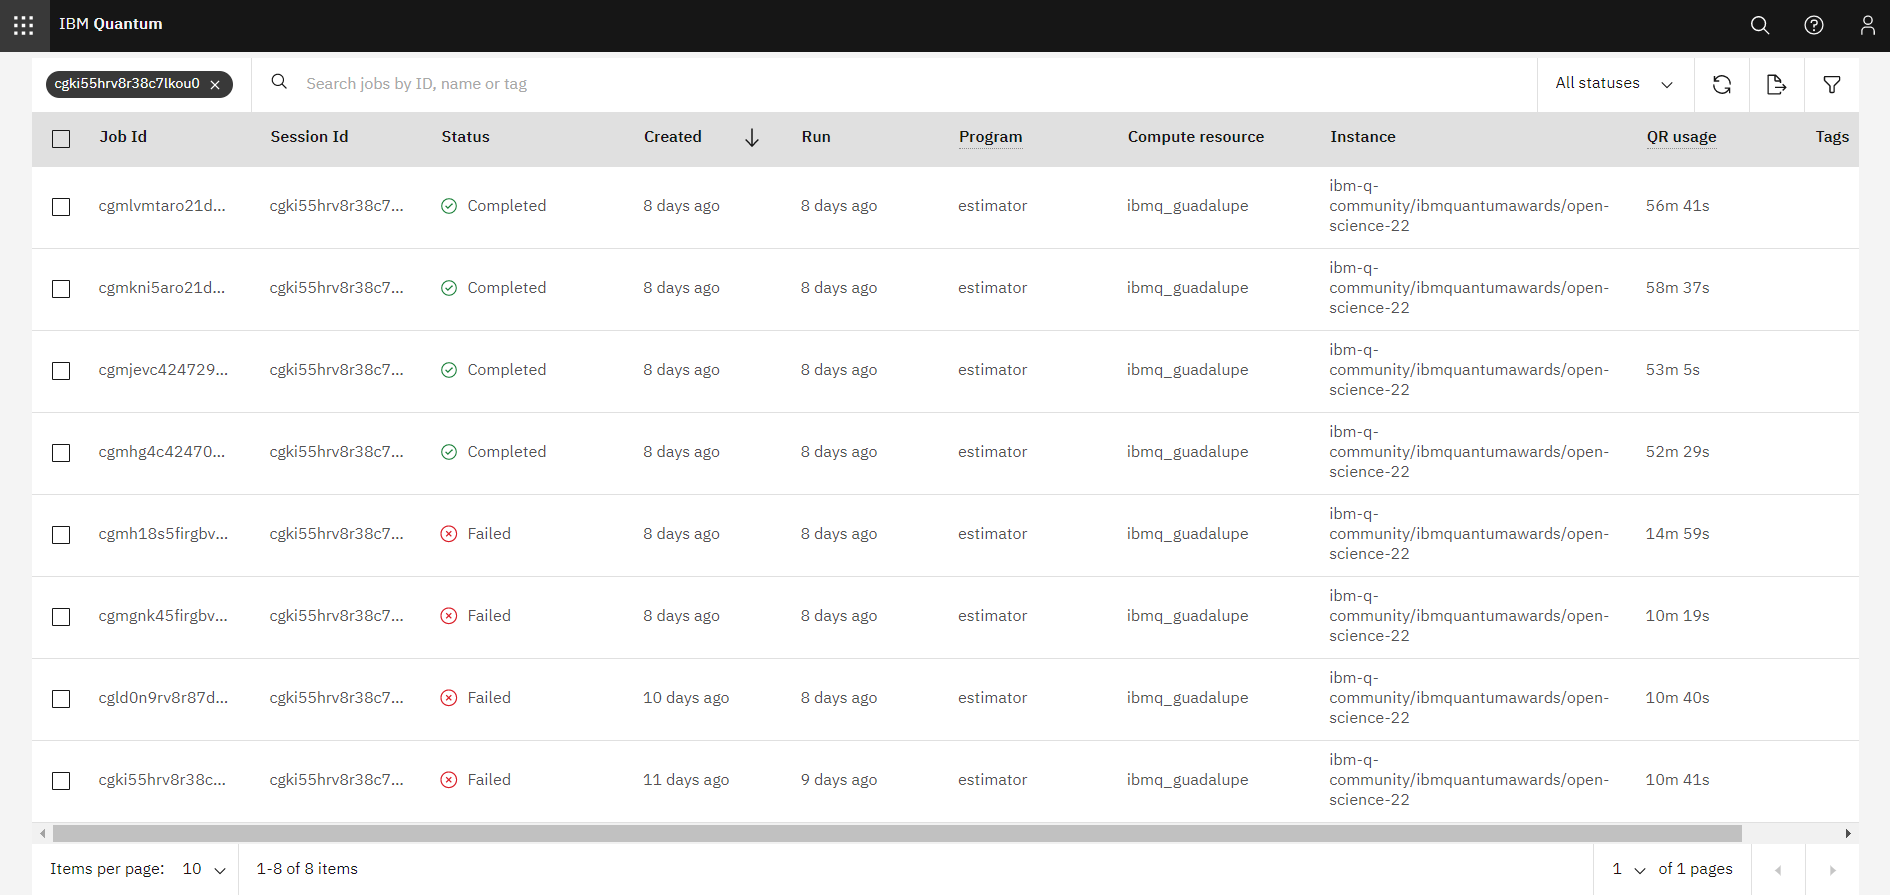

In [53]:
# Setup Estimator
start = time.time()
# with Session(service=service, backend="ibmq_guadalupe") as session:
# Prepare primitive
rt_estimator = RuntimeEstimator(session=session, options=options_r3)
# Set up algorithm
custom_vqe = CustomVQE(rt_estimator, ansatz_opt, optimizer, callback=callback_sim)
# Run algorithm
start_time = time.time()
result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time.time()
print(f'execution time (s): {end - start:.2f}')

LOG::ESTIMATOR_SESSION_START_TIME::1680676878.9948945

LOG::JOB_START_TIME::1680676879.0161
LOG::JOB_ID::cgmhg4c42470e1978odg
LOG::PARAMETERS::[-0.2  0.2 -0.2  0.2 -0.2  0.2]


runtime_job._start_websocket_client:WARNING:2023-04-05 14:25:22,239: An error occurred while streaming results from the server for job cgmhg4c42470e1978odg:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



LOG::JOB_END_TIME::1680684923.5924091
LOG::JOB_REUSLT::EstimatorResult(values=array([-17.92643831]), metadata=[{'standard_error': 0.11016766766208452, 'confidence_interval': [-17.969385354944713, -17.883491255808103], 'confidence_level': 0.95, 'shots': 1682304, 'samples': 13143, 'sampling_overhead': 3.285766637831603, 'total_mitigated_layers': 1}])
LOG::CALLBACK_CALLED

LOG::JOB_START_TIME::1680684923.645097
LOG::JOB_ID::cgmjevc424729bqjpqkg
LOG::PARAMETERS::[ 0.2 -0.2  0.2 -0.2  0.2 -0.2]


runtime_job._start_websocket_client:WARNING:2023-04-05 15:51:58,708: An error occurred while streaming results from the server for job cgmjevc424729bqjpqkg:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



LOG::JOB_END_TIME::1680690119.8919842
LOG::JOB_REUSLT::EstimatorResult(values=array([-17.81605892]), metadata=[{'standard_error': 0.11035813695604013, 'confidence_interval': [-17.85900614933045, -17.77311169618918], 'confidence_level': 0.95, 'shots': 1712640, 'samples': 13380, 'sampling_overhead': 3.3450445102703945, 'total_mitigated_layers': 1}])
LOG::CALLBACK_CALLED

LOG::JOB_START_TIME::1680690119.9367745
LOG::JOB_ID::cgmkni5aro21dgkn3f40
LOG::PARAMETERS::[ 0.2  0.2  0.2 -0.2 -0.2 -0.2]


runtime_job._start_websocket_client:WARNING:2023-04-05 17:17:37,604: An error occurred while streaming results from the server for job cgmkni5aro21dgkn3f40:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



LOG::JOB_END_TIME::1680695258.9953804
LOG::JOB_REUSLT::EstimatorResult(values=array([-17.70587768]), metadata=[{'standard_error': 0.11058453560753462, 'confidence_interval': [-17.748825114798503, -17.66293023716924], 'confidence_level': 0.95, 'shots': 1761536, 'samples': 13762, 'sampling_overhead': 3.4405797872885455, 'total_mitigated_layers': 1}])
LOG::CALLBACK_CALLED

LOG::JOB_START_TIME::1680695259.0508485
LOG::JOB_ID::cgmlvmtaro21dgkoe78g
LOG::PARAMETERS::[-0.2 -0.2 -0.2  0.2  0.2  0.2]


runtime_job._start_websocket_client:WARNING:2023-04-05 18:42:51,808: An error occurred while streaming results from the server for job cgmlvmtaro21dgkoe78g:
Traceback (most recent call last):
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\MEGHANA\anaconda3\envs\qiskit_evn\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "C:\\Users\\MEGHANA\\anaconda3\\envs\\qiskit_evn\\lib\\site-packages\\websocke

LOG::JOB_END_TIME::1680700378.877418
LOG::JOB_REUSLT::EstimatorResult(values=array([-18.10953615]), metadata=[{'standard_error': 0.110514897300581, 'confidence_interval': [-18.15248311381268, -18.066589182701904], 'confidence_level': 0.95, 'shots': 1817984, 'samples': 14203, 'sampling_overhead': 3.5507540876999633, 'total_mitigated_layers': 1}])
LOG::CALLBACK_CALLED

LOG::JOB_START_TIME::1680700378.9137907


IBMRuntimeError: 'Failed to run program: \'400 Client Error: Bad Request for url: https://runtime-us-east.quantum-computing.ibm.com/jobs. {"errors":[{"code":1217,"message":"Session has been closed.","solution":"Reduce time between submitting subsequent jobs in a session.","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"cgmn7mvtpqaag9sk3ccg"}\''

Unfortunately, the session closed after these jobs as seen in the output of the cell executed above.

__Nevertheless, the results for these 4 jobs in the VQE run were obtained in the 1% error limit.__

### 5.3) Saving the results

In [54]:
log_file.close()

In [56]:
save_object(start_time, directory_results + "1)_estimator_session_start_time" + problem_name + ".pkl")

save_object(job_start_time_list, directory_results + "2)_job_start_time_list" + problem_name + ".pkl")

save_object(job_id_list, directory_results + "3)_job_id_list" + problem_name + ".pkl")
save_object(parameter_list, directory_results + "4)_parameter_list" + problem_name + ".pkl")

save_object(job_list, directory_results + "5)_job_list" + problem_name + ".pkl")

save_object(intermediate_info_sim_backend, directory_results + "6)_intermediate_info_sim_backend" + problem_name + ".pkl")

save_object(job_end_time_list, directory_results + "7)_job_end_time_list" + problem_name + ".pkl")


# save_object(result, directory_results + "8)_result" + problem_name + ".pkl")

### 5.4) Plotting the results

___<font color=blue>If the network delays/interuptions could be avoided the optimizer would converge better with more number of iteration.</font>___

__<font color=blue>The judges are advised to run the code when they have priority access to _ibmq\_guadalupe_ with less queue so that network issues and such interruptions are not encountered.</font>__

In [57]:
gs_energy = -18

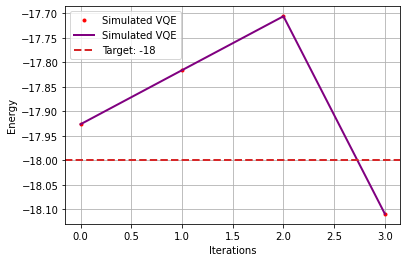

In [58]:
plt.plot(intermediate_info_sim_backend, ".", color='r', lw=2, label='Simulated VQE')
plt.plot(intermediate_info_sim_backend, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

## 6) Some discussion on the scalability of this solution approach ...

In this notebook, we saw that even without using VQE, we were able to prepare the ground state of the required Kagome-star structure to a high degree of accuracy by exploiting the symmetry in the arrangement to find the analytical form of the ground state. It was essentially an exercise in finding the lowest eigenvalue using angular momentum algebra.

This formalism can be extended to larger Kagome lattices as well. 

__The following figure from _[Singh, Rajiv RP, and David A. Huse. "Ground state of the spin-1/2 kagome-lattice Heisenberg antiferromagnet." Physical Review B 76.18 (2007): 180407](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.76.180407)_ helps in visual understanding:__

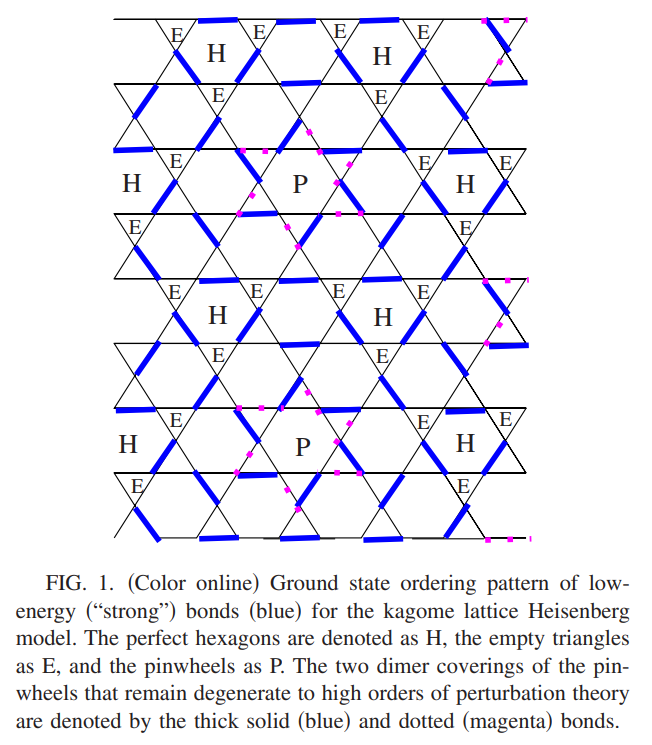

__Such a strucure is termed as a "Valence Bond Crystal (VBC) phase" which essentially consists of singlet states between certain neighbouring spins. Such a structure has degeneracy arising from the different possibilities of singlet states distribution in the ground state. Hence, such a system is a quantum-spin liquid.__

___<font color=green>Now to prepare the ground state on a larger quantum computer, the task is to identify the appropriate spin to qubit mapping to create the necessary singlet states.</font>___

__<font color=blue>The ansatz then can be designed such that it is</font> <font color=green>_problem inspired and well as Hardware Efficient</font>_ <font color=blue>based on the quantum harware being used.</font>__

<font color=green>Error mitigation techniques can then be applied to first profile the device noise characterisitcs and apply the necessary inverse tranformation / postprocessing to attempt to nullify the effects of noise.</font>

<font color=green>We have used Probabilistic Error Cancellation (resilience_level=3 in QiskitRuntime Option) in this notebook.</font>

## 7) Futher Explorations

There is literature to explore for preparing the Kagome lattice ground state on larger quantum harwares in the future: 

___[Kattemölle, Joris, and Jasper van Wezel. "Variational quantum eigensolver for the Heisenberg antiferromagnet on the kagome lattice." Physical Review B 106.21 (2022): 214429](https://link.aps.org/doi/10.1103/PhysRevB.106.214429)___

Moreover, it is also worthwhile to explore next-nearest and next-next-nearest couplings in the Kagome lattice and study the ground state preparation of such systems on superconducting qubits.

Such extended interactions are present in natural systems and are being studied in other quantum simulation setups like Rydberg Atoms:

___[Samajdar, R., Ho, W. W., Pichler, H., Lukin, M. D., & Sachdev, S. (2021). Quantum phases of Rydberg atoms on a kagome lattice. Proceedings of the National Academy of Sciences, 118(4), e2015785118.](https://www.pnas.org/doi/10.1073/pnas.2015785118)___

## Acknowledgements

I would like to express my gratitude to my academic advisor - Prof. [Apoorva Patel](https://chep.iisc.ac.in/Personnel/adpatel.html) for his important insights and discussions in solving this problem, apart from his constant support in teaching us students quantum computation and helping us with any physics queries we have.

I would also like to thank Prof. [Chandni Usha](http://iap.iisc.ac.in/people/chandni-u/), Prof. [Pavan Nukala](http://www.cense.iisc.ac.in/pavan-nukala), and Prof. [Sebabrata Mukherjee](https://sebabrata-mukherjee.github.io/seba.html) for their coursework which introduced me to a several concepts in topological physics and material science. That background actually got me interested to participate in this endeavour in the context of Quantum Computing, and also to explore other rich aspects of Kagome physics beyond the requirements of this Open Science Prize.

Lastly, thanks to IBM Quantum for giving us students the opportunity to experiment with such an exclusive quantum harware. The long queues, late-night reservations, failing jobs, and classical infrastructure challenges were frustrating at times but that also had its own learnings nevertheless. It only demonstrates how important classical framework code and infrastructure is to seamlessly allow cloud access to multiple users across the world and the efficient orchestration of heterogenous hybrid quantum-classical workloads. It was indeed a valuable experience being part of this large experiment. 

<font color=green>Hope the feedback from us participants during the course of the challenges helps in solving some of these challenges.</font>

<font color=green>Looking forward to next year's problem!!!</font>

In [61]:
import qiskit_ibm_runtime
display(qiskit_ibm_runtime.version.get_version_info())

'0.8.0'

In [62]:
import qiskit.tools.jupyter
%qiskit_version_table